


1.   Sree Charan Reddy
2.   862327313
3. sgang011@ucr.edu



In [600]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
# Load MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [619]:
# print(x_train[0])
# print(len(x_train))
# print(len(y_test))

In [602]:
# 2D Matrix to 1D-dimensional vectors
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

In [603]:
#Printing one vector (digit) to check the data
#print(x_train[0])

In [604]:
# Convert labels to one-hot encoded vectors
def one_hot_encode(labels, num_classes=10):
    encoded_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded_labels[i][label] = 1
    return encoded_labels

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [605]:
#Normalizing the pixel values to the range [0,1]
x_train = x_train/255.0
x_test = x_test/255.0

In [606]:
import numpy as np
import matplotlib.pyplot as plt
import time

def loss_and_gradient(W, xi, yohi):
    W = np.transpose(W) 
    y_pred = np.dot(xi, W)
    loss = 0.5 * np.linalg.norm(y_pred - yohi) ** 2
    grad = np.outer(y_pred - yohi, xi)
    return loss, grad

def mini_SGD(n, B, lr):
    start_time = time.time()
    accuracy_list = []
    loss_list = []
    itr_list = []
    #t = []

    #weight matrix
    W = np.zeros((10, 784))

    for k in range(n):
        # Random Mini Batch
        indices = np.random.choice(len(y_train), B, replace=False)
        X_b = x_train[indices]
        y_b = y_train[indices]

        loss = 0
        gradient = np.zeros((10, 784))

        for x, yoh in zip(X_b, y_b):
            loss_i, grad_i = loss_and_gradient(W, x, yoh)
            loss += loss_i
            gradient += grad_i
        gradient /= B

        # Update weights
        W -= lr * gradient

        acc_train = 0.0
        
        if (k + 1) % 100 == 0:
            y_pred = np.argmax(np.dot(x_train, W.T), axis=1)
            y_true = np.argmax(y_train, axis = 1)
            acc_train = np.mean(y_pred == y_true)
            print(f"Iteration {k+1}: training accuracy = {acc_train:.4f}")

            if(k == n-1):
                  print("End of the batch")
        
        #Lists
        accuracy_list.append(acc_train)
        loss_list.append(loss)
        itr_list.append(k)

      

    #result = zip(accuracy_list, loss_list, itr_list)

    #Time
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Total Time: {total_time}")

    #Plotting
    x = itr_list
    y = loss_list
    z = accuracy_list

    fig, axs = plt.subplots(1, 2)

    #Loss vs Iterations plot:
    axs[0].plot(x, y)
    axs[0].set_title(f"Loss vs Iterations(B {B}, Lr {eta})")

    #Accuracy vs Iterations plot:
    axs[1].plot(x, z)
    axs[1].set_title(f'Accuracy vs Iterations(B {B}, Lr {eta})')

    plt.subplots_adjust(wspace=0.4)

    plt.show()


Iteration 100: training accuracy = 0.4357
Iteration 200: training accuracy = 0.6564
Iteration 300: training accuracy = 0.6757
Iteration 400: training accuracy = 0.7065
Iteration 500: training accuracy = 0.7681
Iteration 600: training accuracy = 0.7382
Iteration 700: training accuracy = 0.7543
Iteration 800: training accuracy = 0.7990
Iteration 900: training accuracy = 0.7814
Iteration 1000: training accuracy = 0.7922
End of the batch
Total Time: 4.853456020355225


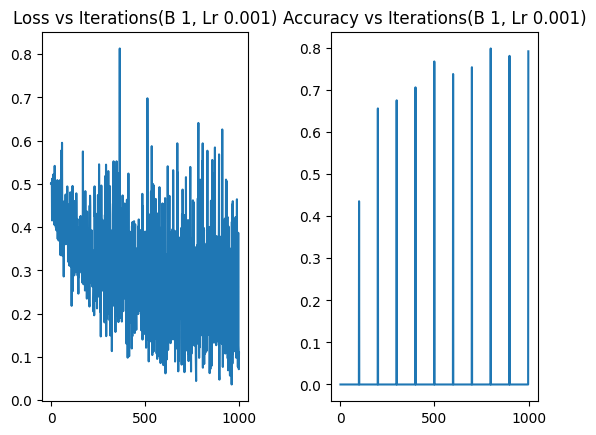

Iteration 100: training accuracy = 0.7212
Iteration 200: training accuracy = 0.7519
Iteration 300: training accuracy = 0.7392
Iteration 400: training accuracy = 0.7625
Iteration 500: training accuracy = 0.7732
Iteration 600: training accuracy = 0.7784
Iteration 700: training accuracy = 0.7769
Iteration 800: training accuracy = 0.7854
Iteration 900: training accuracy = 0.8063
Iteration 1000: training accuracy = 0.8092
End of the batch
Total Time: 3.7922003269195557


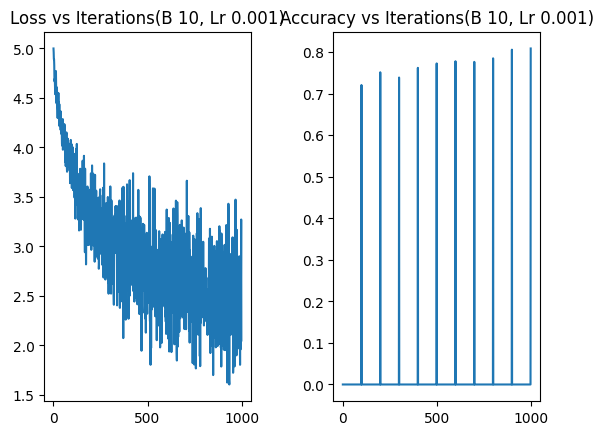

Iteration 100: training accuracy = 0.7513
Iteration 200: training accuracy = 0.7636
Iteration 300: training accuracy = 0.7731
Iteration 400: training accuracy = 0.7803
Iteration 500: training accuracy = 0.7904
Iteration 600: training accuracy = 0.7961
Iteration 700: training accuracy = 0.7997
Iteration 800: training accuracy = 0.8059
Iteration 900: training accuracy = 0.8087
Iteration 1000: training accuracy = 0.8110
End of the batch
Total Time: 9.165525436401367


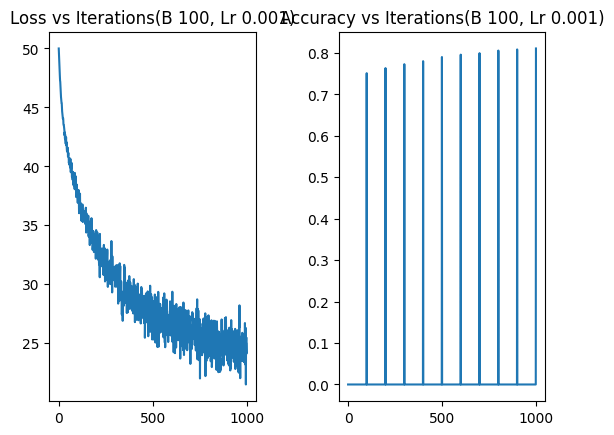

Iteration 100: training accuracy = 0.7540
Iteration 200: training accuracy = 0.7648
Iteration 300: training accuracy = 0.7754
Iteration 400: training accuracy = 0.7842
Iteration 500: training accuracy = 0.7915
Iteration 600: training accuracy = 0.7974
Iteration 700: training accuracy = 0.8024
Iteration 800: training accuracy = 0.8066
Iteration 900: training accuracy = 0.8090
Iteration 1000: training accuracy = 0.8123
End of the batch
Total Time: 39.66877460479736


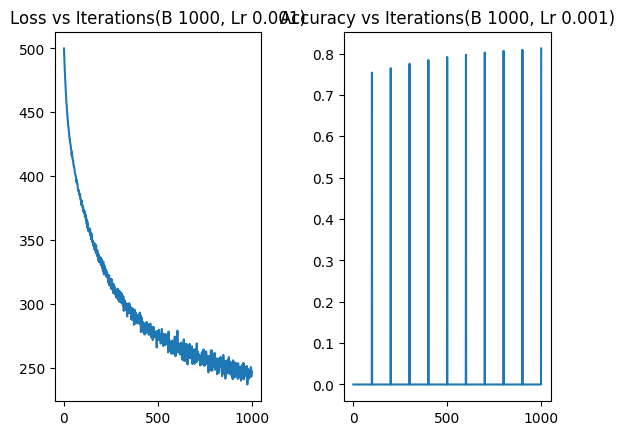

Iteration 100: training accuracy = 0.5700
Iteration 200: training accuracy = 0.7335
Iteration 300: training accuracy = 0.5614
Iteration 400: training accuracy = 0.6711
Iteration 500: training accuracy = 0.6871
Iteration 600: training accuracy = 0.6658
Iteration 700: training accuracy = 0.5599
Iteration 800: training accuracy = 0.7305
Iteration 900: training accuracy = 0.6773
Iteration 1000: training accuracy = 0.6646
End of the batch
Total Time: 3.525329351425171


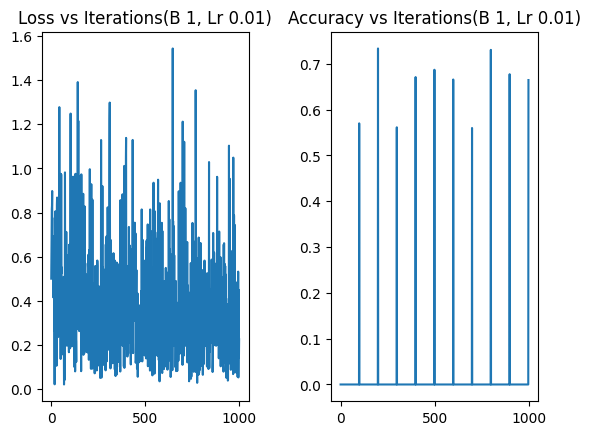

Iteration 100: training accuracy = 0.7798
Iteration 200: training accuracy = 0.8204
Iteration 300: training accuracy = 0.8150
Iteration 400: training accuracy = 0.8367
Iteration 500: training accuracy = 0.8394
Iteration 600: training accuracy = 0.8279
Iteration 700: training accuracy = 0.8391
Iteration 800: training accuracy = 0.8293
Iteration 900: training accuracy = 0.8314
Iteration 1000: training accuracy = 0.8225
End of the batch
Total Time: 3.898913621902466


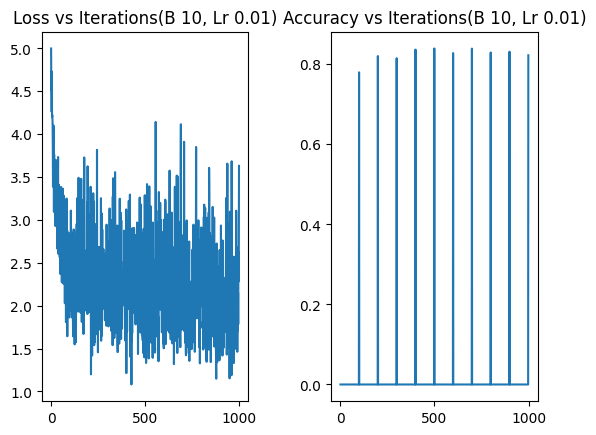

Iteration 100: training accuracy = 0.8058
Iteration 200: training accuracy = 0.8313
Iteration 300: training accuracy = 0.8365
Iteration 400: training accuracy = 0.8380
Iteration 500: training accuracy = 0.8443
Iteration 600: training accuracy = 0.8445
Iteration 700: training accuracy = 0.8462
Iteration 800: training accuracy = 0.8439
Iteration 900: training accuracy = 0.8481
Iteration 1000: training accuracy = 0.8477
End of the batch
Total Time: 7.851717710494995


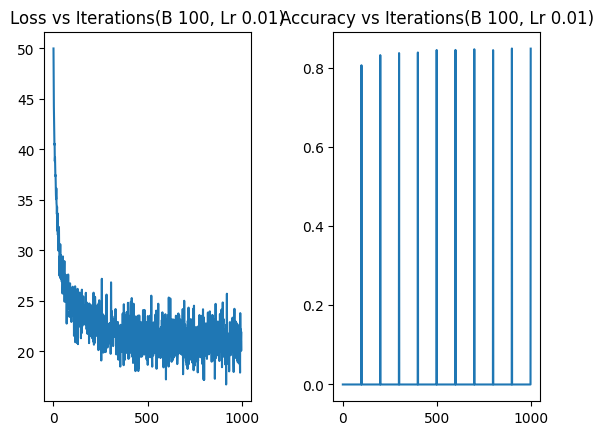

Iteration 100: training accuracy = 0.8118
Iteration 200: training accuracy = 0.8308
Iteration 300: training accuracy = 0.8397
Iteration 400: training accuracy = 0.8421
Iteration 500: training accuracy = 0.8438
Iteration 600: training accuracy = 0.8455
Iteration 700: training accuracy = 0.8464
Iteration 800: training accuracy = 0.8477
Iteration 900: training accuracy = 0.8477
Iteration 1000: training accuracy = 0.8473
End of the batch
Total Time: 40.55753445625305


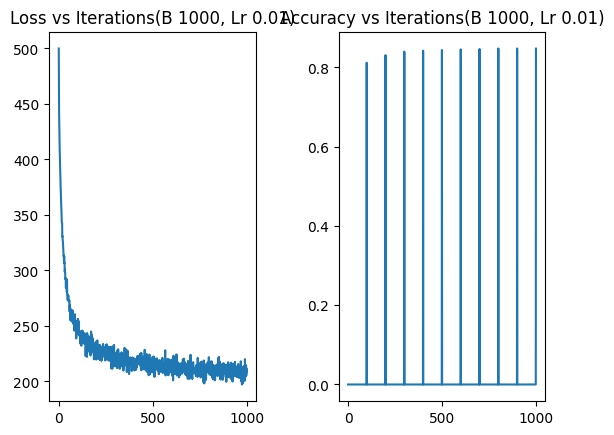

Iteration 100: training accuracy = 0.0973
Iteration 200: training accuracy = 0.0377
Iteration 300: training accuracy = 0.0975
Iteration 400: training accuracy = 0.0951
Iteration 500: training accuracy = 0.0975
Iteration 600: training accuracy = 0.1006
Iteration 700: training accuracy = 0.1501
Iteration 800: training accuracy = 0.1343
Iteration 900: training accuracy = 0.1122


/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:936: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


Iteration 1000: training accuracy = 0.0987
End of the batch
Total Time: 3.908859968185425


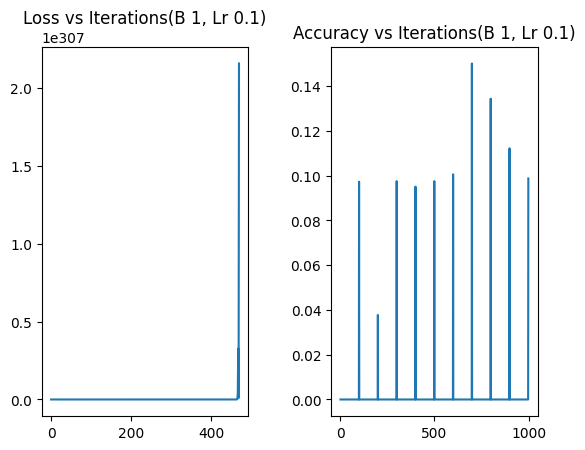

Iteration 100: training accuracy = 0.0993
Iteration 200: training accuracy = 0.0993
Iteration 300: training accuracy = 0.0993


<ipython-input-606-fde5fe50ead0>:34: RuntimeWarning: overflow encountered in double_scalars
  loss += loss_i


Iteration 400: training accuracy = 0.0993
Iteration 500: training accuracy = 0.0993
Iteration 600: training accuracy = 0.0993


<ipython-input-606-fde5fe50ead0>:35: RuntimeWarning: overflow encountered in add
  gradient += grad_i


Iteration 700: training accuracy = 0.0987
Iteration 800: training accuracy = 0.0987
Iteration 900: training accuracy = 0.0987
Iteration 1000: training accuracy = 0.0987
End of the batch
Total Time: 4.2221009731292725


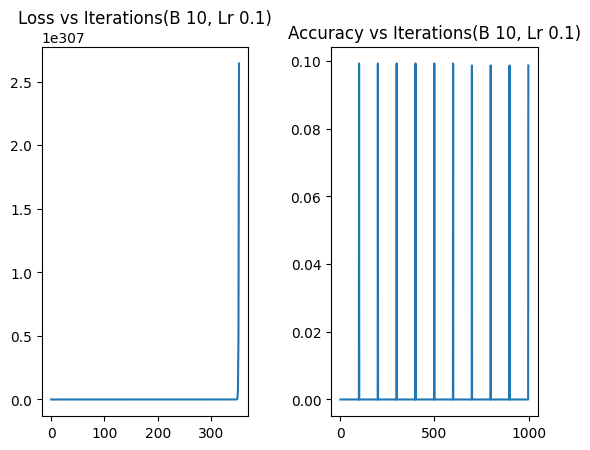

Iteration 100: training accuracy = 0.1124
Iteration 200: training accuracy = 0.1124
Iteration 300: training accuracy = 0.1124
Iteration 400: training accuracy = 0.1124
Iteration 500: training accuracy = 0.1124
Iteration 600: training accuracy = 0.1124
Iteration 700: training accuracy = 0.0987
Iteration 800: training accuracy = 0.0987
Iteration 900: training accuracy = 0.0987
Iteration 1000: training accuracy = 0.0987
End of the batch
Total Time: 7.049877643585205


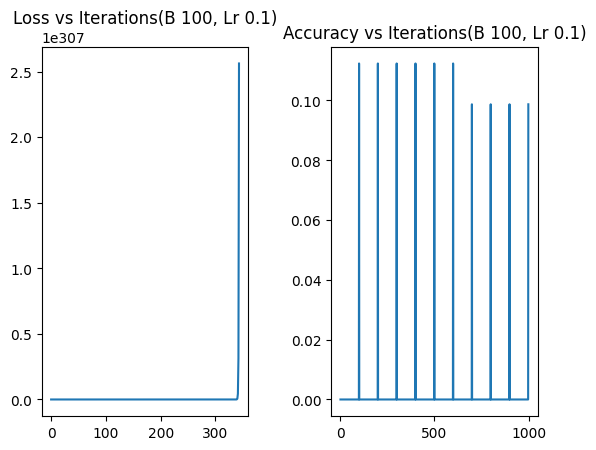

Iteration 100: training accuracy = 0.1124
Iteration 200: training accuracy = 0.1124
Iteration 300: training accuracy = 0.1124
Iteration 400: training accuracy = 0.1124
Iteration 500: training accuracy = 0.1124
Iteration 600: training accuracy = 0.1124
Iteration 700: training accuracy = 0.0987
Iteration 800: training accuracy = 0.0987
Iteration 900: training accuracy = 0.0987
Iteration 1000: training accuracy = 0.0987
End of the batch
Total Time: 41.73001194000244


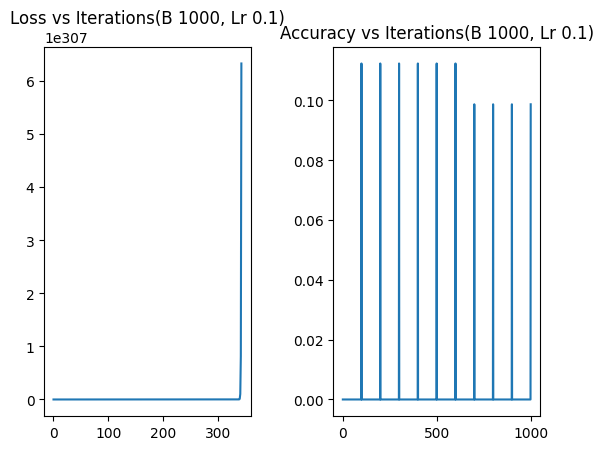

In [607]:
ITR = 1000

lossperBatch = []
time_ls = []
accuracy = []
iteration = []

for eta in [0.001, 0.01, 0.1]:
    for B in [1, 10, 100, 1000]:
        mini_SGD(ITR, B, eta)

## **From the Graphs, We could see that, (Batch 10,100) at Learning rate 0.01 the model is performing with high accuracy and low loss.**

# At Batch size 100 the model is gaining high Accuracy 

In [ ]:
#Role of trainig dataset size
N = [100, 500, 1000, 5000, 10000]
for i in N:
    mini_SGD(10, 100, 0.01)

In [625]:
#Simpler Life with Pytorch
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def sgd(iterations, batches, lr):
    
    model = nn.Sequential(nn.Linear(784, 10))

    # Load the MNIST dataset
    train_dataset = torchvision.datasets.MNIST(root='./data', 
                                               train=True, 
                                               transform=torchvision.transforms.ToTensor(),
                                               download=True)
    test_dataset = torchvision.datasets.MNIST(root='./data', 
                                              train=False, 
                                              transform=torchvision.transforms.ToTensor(),
                                              download=True)

    train_loader = DataLoader(train_dataset, batch_size=batches, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batches, shuffle=False)

    # loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training
    for epoch in range(iterations):
        for i, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            inputs = inputs.view(-1, 784) # Flatten the input images
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            if i % 100 == 0:
                print("Iteration %d, Loss %.4f" % (epoch, loss.item()))

    # Evaluate
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.view(-1, 784) 
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    print("Test Accuracy: %.2f%%" % (100 * correct / total))


In [627]:
itr=10
batch = 100
lr = 0.01
sgd(itr, batch, lr)

Iteration 0, Loss 2.2904
Iteration 0, Loss 1.6028
Iteration 0, Loss 1.1927
Iteration 0, Loss 1.0648
Iteration 0, Loss 0.9852
Iteration 0, Loss 0.7721
Iteration 1, Loss 0.7300
Iteration 1, Loss 0.7541
Iteration 1, Loss 0.6404
Iteration 1, Loss 0.5463
Iteration 1, Loss 0.5185
Iteration 1, Loss 0.5375
Iteration 2, Loss 0.4842
Iteration 2, Loss 0.5448
Iteration 2, Loss 0.5364
Iteration 2, Loss 0.6022
Iteration 2, Loss 0.4567
Iteration 2, Loss 0.5212
Iteration 3, Loss 0.4638
Iteration 3, Loss 0.5354
Iteration 3, Loss 0.4345
Iteration 3, Loss 0.4154
Iteration 3, Loss 0.5190
Iteration 3, Loss 0.4769
Iteration 4, Loss 0.5420
Iteration 4, Loss 0.3637
Iteration 4, Loss 0.3958
Iteration 4, Loss 0.3869
Iteration 4, Loss 0.4472
Iteration 4, Loss 0.3854
Iteration 5, Loss 0.4531
Iteration 5, Loss 0.3340
Iteration 5, Loss 0.4216
Iteration 5, Loss 0.4206
Iteration 5, Loss 0.3856
Iteration 5, Loss 0.3897
Iteration 6, Loss 0.4721
Iteration 6, Loss 0.3893
Iteration 6, Loss 0.5021
Iteration 6, Loss 0.4583


## Test accuracy Using Pytorch is 90.42%